# 6. 시계열 분석

## 6-1. 시계열 문제
> 시간에 따라 변하는 데이터를 사용하여 추이를 분석하는 것
- 주가/환율 변동, 기온/습도 변화
- 추세를 파악하거나 향후 전망 등을 예측하기 위한 용도

### 시계열 형태(The Components of Time Series)
1. 불규칙 변동 (irregular variation): 규칙성이 없고 예측 불가능하고 우연히 발생하는 변동
2. 추세 변동 (trend variation): 장기적인 변화 추세 일정한 상태(stationary) -> 짧은 기간에는 찾기 어려움
3. 순환 변동 (cyclical variation)
4. 계절 변동 (seasonal variation)

## 6-2. AR, MA, ARMA, ARIMA
> 독립 변수 (independent variable)를 사용해 종속 변수(dependent variable)를 예측 -> 시간을 독립 변수로 사용

### 6-2-1. AR(AutoRegressive, 자기회귀) 모델
- 이전 관측값이, 이후 관측값에 영향을 준다는 아이디어 차용
- $Z_t = \phi_1Z_{t-1} + \phi_2Z_{t-2}+ \dots + \phi_pZ_{t-p} + a_t$
- $\phi$ = 과거가 현재에 미치는 영향을 나타내는 모수 -> 이전 데이터의 상태에서 현재 데이터의 상태를 추론

### 6-2-2. MA(Moving Average, 이동평균) 모델
- 트렌드가 변화하는 상황에 적합한 회귀 모델
- 윈도우 개념 적용 -> 시계열을 따라 윈도우 크기만큼 슬라이딩(moving)됨
- $Z_t = \theta_1 a_{t-1} + \theta_2 a_{t_2} + \dots + \theta_p a_{t-p} + a_t$
- $\theta$ = 매개변수, $a$ = 과거 시점의 오차 -> 이전 데이터의 오차에서 현재 데이터의 상태를 추론

### 6-2-3. ARMA(AutoRegressive Moving Average, 자기 회귀 이동 평균) 모델
- AR과 MA를 섞은 모델
- 과거 데이터의 선형 관계
- $Z_t = a + \phi_1 Z_{t-1} + \dots + \phi_p Z_{t-p} + \theta_1 a_{t-1} + \dots + \theta_q a_{t-q} + a_t$

### 6-2-4. ARIMA(AutoRegressive Intergrated Moving Average, 자기 회귀 누적 이동 평균) 모델
- 자기 회귀와 이동 평균을 둘 다 고려
- ARMA + 추세(cointegration)

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

# 자전거 매출 데이터
series = pd.read_csv("../data/sales.csv", header=0, parse_dates=[0], index_col=0, date_parser=lambda x: datetime.strptime("199"+x, "%Y-%m")).squeeze()
#
model = sm.tsa.arima.ARIMA(series, order=(5, 1, 0)) # p:자기 회귀 차수, d: 차분 차수, q: 이동 평균 차수
model_fit = model.fit()
#
model_fit.summary()

c:\Users\nuyhc\anaconda3\envs\torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nuyhc\anaconda3\envs\torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nuyhc\anaconda3\envs\torch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Tue, 26 Sep 2023   AIC                            411.302
Time:                        20:57:10   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.978      -0.536       0.521
ar.L4          0.3483      0.294      1.185      0.236      -0.228       0.924
ar.L5          0.3772      0.207      1.826      0.068      -0.028       0.782
sigma2      5049.2115   1540.731      3.277      0.001    2029.435    8068.988
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.53   Prob(JB):                         0.45
Heteroskedasticity (H):               1.43   Skew:                             0.38
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 700x300 with 0 Axes>

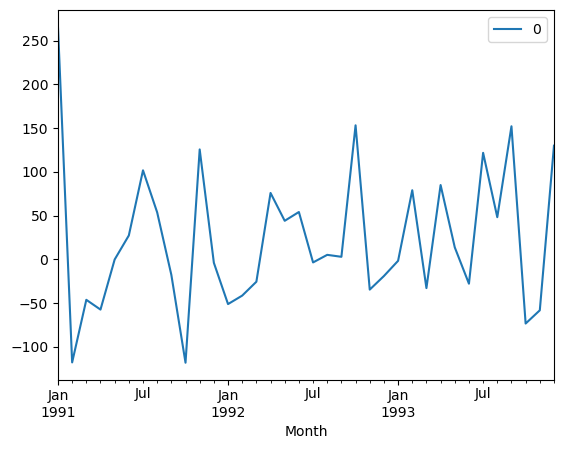

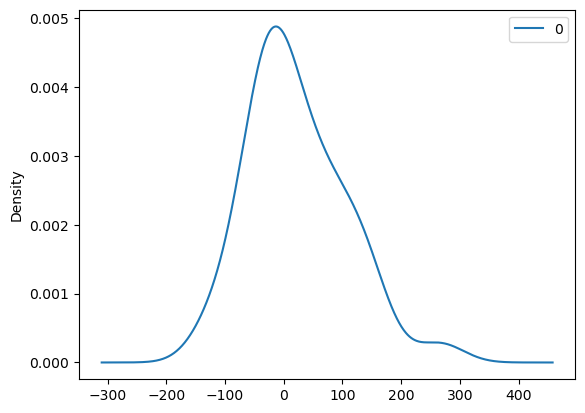

In [23]:
res = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(7, 3))
#
res.plot()
#
res.plot(kind="kde")
plt.show()

Pred: 352.86, Expected: 346.30
Pred: 277.40, Expected: 329.70
Pred: 368.75, Expected: 445.40
Pred: 331.77, Expected: 325.90
Pred: 372.07, Expected: 449.30
Pred: 360.02, Expected: 411.30
Pred: 454.53, Expected: 417.40
Pred: 388.69, Expected: 545.50
Pred: 437.63, Expected: 477.60
Pred: 516.44, Expected: 687.00
Pred: 520.92, Expected: 435.30
Pred: 675.59, Expected: 587.30
Pred: 505.20, Expected: 676.90

Test MSE: 9118.818


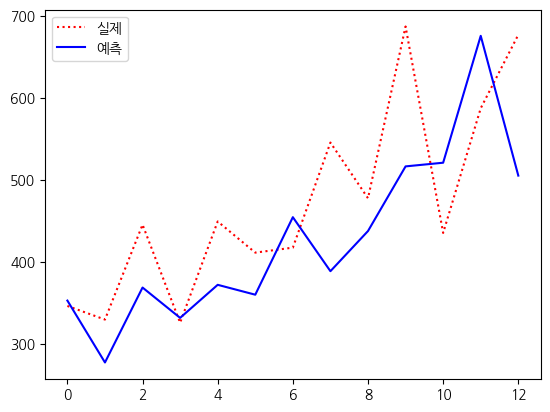

In [30]:
import numpy as np
import koreanize_matplotlib
from sklearn.metrics import mean_squared_error

X = series.values
X = np.nan_to_num(X)
size = int(len(X)*0.66)
train, test = X[:size], X[size:]
history = [x for x in train]
pred = list()
#
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    pred.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f"Pred: {yhat:.2f}, Expected: {obs:.2f}")
error = mean_squared_error(test, pred)
print(f"\nTest MSE: {error:.3f}")
#
plt.plot(test, color="red", linestyle=":")
plt.plot(pred, color="blue")
plt.legend(["실제", "예측"])
plt.show()

## 6-3. RNN (Recurrent Neural Network)
![RNN](https://miro.medium.com/v2/resize:fit:1400/0*V5Q5gGhiDGurHd-z.png)


- 시간적으로 연속성이 있는 데이터를 처리하기 위해 고안된 인공 신경망
- 이전 은닉층이 현재 은닉층의 입력이 되면서 반복되는 순환 구조를 갖음
- 기억 = 현재까지 입력 데이터를 요약한 정보

### RNN 유형
![RNN Type](https://blog.kakaocdn.net/dn/ZMIHH/btqISuYWJBv/b0yfFKD9raXfhkuWC2uLY0/img.png)
1. 일대일: 순환이 없기 때문에 사실상, 순방향 네트워크
2. 일대다: 입력이 하나이고 출력이 다수인 구조 (이미지 캡션)
3. 다대일: 입력이 다수이고 출력이 하나인 구조 (문장 -> 긍/부정 판별)
4. 다대다: 입력과 출력이 다수인 구조 (자동 번역)
5. 동기화 다대다: 다음에 나올 ㄷ단어 예측, 프레임 수준의 비디오 분류

### 6-3-1. RNN 계층과 셀
- RNN 계층(layer): 입력된 배치 순서대로 모두 처리
- RNN 셀(cell): 오직 하나의 단계(time step)만 처리

In [ ]:
import torch.nn as nn

nn.RNNCell # SimpleRNN 계층 RNN 셀
nn.GRUCell # GRU 계층 GRU 셀
nn.LSTMCell # LSTM 계층 LSTM 셀

### 6-3-2. RNN 구조
- 은닉층 노드들이 연결되어 이전 단계 정보를 은닉층 노드에 저장할 수 있도록 구성한 신경망
- 3개의 가중치를 갖음
  - $W_{xh}$: 입력층 -> 은닉층
  - $W_{hh}$: t 시점의 은닉층 -> t+1 시점의 은닉층
  - $W_{hy}$: 은닉층 -> 출력층

#### RNN 계산
- 은닉층:
  - 이전 은닉층X은닉층 -> 은닉층 가중치+입력층 -> 은닉층 가중치X(현재)입력값
  - $h_t = tanh(\hat y_t)$
  - $\hat y_t = W_{hh} \times h_{t-1} + W_{xh} \times x_t$
- 출력층:
  - softmax(은닉층 -> 출력층 가중치X현재 은닉층)
  - $\hat y_t = softmax(W_{hy} \times h_t)$
- 오차(E): 각 단계(t)마다 오차를 측정
- 역전파:
  - BPTT(BackPropagation Through Time)를 이용해 모든 단계마다 처음부터 끝까지 역전파
  - 계산된 오차를 이용해, $W_{xh}, W_{hh}, W_{yh}, bias$ 업데이트
  - 오차가 멀리 전파되면, 기울기 소실(gradient vanishing) + 계산량 증가 -> 생략된-BPTT or GRU or LSTM

### 6-3-3. RNN 셀 구현

In [1]:
import torch
import torchtext # NLP Dataloader, 파일 로드 / 토큰화 / 단어 집합 생성 / 인코딩 / 벡터화 ...
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

In [2]:
# 데이터 전처리
start = time.time()
TEXT = torchtext.data.Field(lower=True, fix_length=200, batch_first=False)
LABEL = torchtext.data.Field(sequential=False)
# 데이터셋 -> IMDB
train_data, test_data = torchtext.datasets.IMDB.splits(TEXT, LABEL)

In [3]:
print(vars(train_data.examples[0]))

{'text': ['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy.', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life,', 'such', 'as', '"teachers".', 'my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', "high's", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"teachers".', 'the', 'scramble', 'to', 'survive', 'financially,', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', "teachers'", 'pomp,', 'the', 'pettiness', 'of', 'the', 'whole', 'situation,', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students.', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school,', 'i', 'immediately', 'recalled', '.........', 'at', '..........', 'high.', 'a', 'classic', 'line:', 'inspector:', "i'm", 'here', 'to', 'sack', 'one', 'of', '

In [4]:
# 전처리 적용
import string

for example in train_data.examples:
    text = [x.lower() for x in vars(example)["text"]]
    text = [x.replace("<br", "") for x in text]
    text = ["".join(c for c in s if c not in string.punctuation) for s in text]
    text = [s for s in text if s]
    vars(example)["text"] = text
    
# train, valid
import random

train_data, valid_data = train_data.split(random_state=random.seed(0), split_ratio=0.8)
#
print(f"Train: {len(train_data)}")
print(f"Valid: {len(valid_data)}")
print(f"Test: {len(test_data)}")

Train: 20000
Valid: 5000
Test: 25000


In [5]:
# 단어 집합 만들기
# 데이터셋에 포함된 단어들을 하나의 딕셔너리와 같은 집합으로 만드는 것 -> 단어들의 중복 제거
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)
#
print(f"Unique Tokens in TEXT: {len(TEXT.vocab)}")
print(f"Unique Tokens in LABEL: {len(LABEL.vocab)}")

Unique Tokens in TEXT: 10002
Unique Tokens in LABEL: 3


In [6]:
LABEL.vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x0000025A0A1D5B20>>,
            {'<unk>': 0, 'pos': 1, 'neg': 2})

In [7]:
# 데이터셋 -> 메모리
BATCH_SIZE = 64
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#
embeding_dim = 100
hidden_size = 300
#
train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits((train_data, valid_data, test_data), batch_size=BATCH_SIZE, device=device)

In [8]:
# 워드 임베딩 및 RNN 셀
class RNNCell_Encoder(nn.Module):
    def __init__(self, input_dim, hidden_size):
        super(RNNCell_Encoder, self).__init__()
        self.rnn = nn.RNNCell(input_dim, hidden_size)
    def forward(self, inputs):
        bz = inputs.shape[1]
        ht = torch.zeros((bz, hidden_size)).to(device)
        for word in inputs:
            ht = self.rnn(word, ht)
        return ht
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim)
        self.rnn = RNNCell_Encoder(embeding_dim, hidden_size)
        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, 3)
    def forward(self, x):
        x = self.em(x)
        x = self.rnn(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
model = Net()
model.to(device)
#
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [14]:
def training(epoch, model, trainloader, validloader):
    correct = 0
    total = 0
    running_loss = 0
    #
    model.train()
    for b in trainloader:
        x, y = b.text, b.label
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total
    #
    valid_correct = 0
    valid_total = 0
    valid_running_loss = 0
    #
    model.eval()
    with torch.no_grad():
        for b in validloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            valid_correct += (y_pred == y).sum().item()
            valid_total += y.size(0)
            valid_running_loss += loss.item()
    #
    epoch_valid_loss = valid_running_loss / len(validloader.dataset)
    epoch_valid_acc = valid_correct / valid_total
    #
    print('epoch: ', epoch,
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'valid_loss： ', round(epoch_valid_loss, 3),
          'valid_accuracy:', round(epoch_valid_acc, 3)
          )
    return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [15]:
epochs = 5
train_loss, train_acc = [], []
valid_loss, valid_acc = [], []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch, model, train_iterator, valid_iterator)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_acc)
print()
end = time.time()
print(end-start)

epoch:  0 loss：  0.011 accuracy: 0.552 valid_loss：  0.011 valid_accuracy: 0.497
epoch:  1 loss：  0.01 accuracy: 0.561 valid_loss：  0.011 valid_accuracy: 0.514
epoch:  2 loss：  0.01 accuracy: 0.569 valid_loss：  0.011 valid_accuracy: 0.503
epoch:  3 loss：  0.01 accuracy: 0.576 valid_loss：  0.011 valid_accuracy: 0.507
epoch:  4 loss：  0.01 accuracy: 0.583 valid_loss：  0.011 valid_accuracy: 0.496

423.40938782691956


In [16]:
def evaluate(epoch, model, testloader):    
    test_correct = 0
    test_total = 0
    test_running_loss = 0
    
    model.eval()
    with torch.no_grad():
        for b in testloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()

    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total

    print('epoch: ', epoch,
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
          )
    return epoch_test_loss, epoch_test_acc

In [17]:
epochs = 5
test_loss, test_acc = [], []

for epoch in range(epochs):
    epoch_test_loss, epoch_test_acc = evaluate(epoch, model, test_iterator)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

end = time.time()
print(end-start)

epoch:  0 test_loss：  0.011 test_accuracy: 0.513
epoch:  1 test_loss：  0.011 test_accuracy: 0.513
epoch:  2 test_loss：  0.011 test_accuracy: 0.513
epoch:  3 test_loss：  0.011 test_accuracy: 0.513
epoch:  4 test_loss：  0.011 test_accuracy: 0.513
480.1852660179138


### 6-3-4. RNN 계층 구현

In [19]:
start=time.time()

TEXT = torchtext.data.Field(sequential = True, batch_first = True, lower = True)
LABEL = torchtext.data.Field(sequential = False, batch_first = True) 
#
train_data, test_data = torchtext.datasets.IMDB.splits(TEXT, LABEL)
train_data, valid_data = train_data.split(split_ratio = 0.8)
#
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)
#
BATCH_SIZE = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#
train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits((train_data, valid_data, test_data), batch_size = BATCH_SIZE,device = device)
#
vocab_size = len(TEXT.vocab)
n_classes = 2  

In [20]:
class BasicRNN(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
        super(BasicRNN, self).__init__()
        self.n_layers = n_layers
        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(dropout_p)
        self.rnn = nn.RNN(embed_dim, self.hidden_dim, num_layers=self.n_layers, batch_first=True)
        self.out = nn.Linear(self.hidden_dim, n_classes)
    def forward(self, x):
        x = self.embed(x)
        h_0 = self._init_state(batch_size=x.size(0)) # 최초 은닉 상태 = 0
        x, _ = self.rnn(x, h_0)
        h_t = x[:, -1, :] # 마지막 임베딩 값
        self.dropout(h_t)
        logit = torch.sigmoid(self.out(h_t))
        return logit
    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [21]:
model = BasicRNN(n_layers=1, hidden_dim=256, n_vocab=vocab_size, embed_dim=128, n_classes=n_classes, dropout_p=0.5)
model.to(device)
#
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [22]:
def train(epoch, model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1) # 1 2 -> 0 1
        optimizer.zero_grad()
        #
        logit = model(x)
        loss = F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()
        if b%50==0:
            print(f"Train Epoch: {epoch} [{b*len(x)}/{len(train_iter.dataset)} ({100*b/len(train_iter):.0f}%)\tLoss: {loss.item():.6f}]")

def evaluate(model, val_iter):
    model.eval()
    corrects, total, total_loss = 0, 0, 0
    #
    for batch in val_iter:
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1)
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction="sum")
        total += y.size(0)
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data==y.data).sum()
    #
    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [23]:
BATCH_SIZE = 100
LR = 0.001
EPOCHS = 5
for e in range(1, EPOCHS + 1):
    train(e, model, optimizer, train_iterator)
    val_loss, val_accuracy = evaluate(model, valid_iterator)
    print(f"[EPOCH: {e}], Validation Loss: {val_loss:.2f} | Validation Accuracy: {val_accuracy:.2f}")

Train Epoch: 1 [0/20000 (0%)	Loss: 0.685868]
Train Epoch: 1 [5000/20000 (25%)	Loss: 0.693326]
Train Epoch: 1 [10000/20000 (50%)	Loss: 0.691344]
Train Epoch: 1 [15000/20000 (75%)	Loss: 0.699734]
[EPOCH: 1], Validation Loss: 0.69 | Validation Accuracy: 0.49
Train Epoch: 2 [0/20000 (0%)	Loss: 0.694363]
Train Epoch: 2 [5000/20000 (25%)	Loss: 0.694545]
Train Epoch: 2 [10000/20000 (50%)	Loss: 0.693096]
Train Epoch: 2 [15000/20000 (75%)	Loss: 0.697093]
[EPOCH: 2], Validation Loss: 0.69 | Validation Accuracy: 0.49
Train Epoch: 3 [0/20000 (0%)	Loss: 0.695879]
Train Epoch: 3 [5000/20000 (25%)	Loss: 0.692859]
Train Epoch: 3 [10000/20000 (50%)	Loss: 0.694086]
Train Epoch: 3 [15000/20000 (75%)	Loss: 0.692517]
[EPOCH: 3], Validation Loss: 0.69 | Validation Accuracy: 0.50
Train Epoch: 4 [0/20000 (0%)	Loss: 0.687177]
Train Epoch: 4 [5000/20000 (25%)	Loss: 0.694625]
Train Epoch: 4 [10000/20000 (50%)	Loss: 0.691735]
Train Epoch: 4 [15000/20000 (75%)	Loss: 0.692278]
[EPOCH: 4], Validation Loss: 0.69 | Va

In [24]:
test_loss, test_acc = evaluate(model, test_iterator)
print(f"Test Loss: {test_loss:.2f} | Test Accuracy: {test_acc:.2f}")

Test Loss: 0.70 | Test Accuracy: 0.44


## 6-4. LSTM
- RNN: 가중치 업데이트 과정에서 1보다 작은 값이 계속 곱해짐 -> 기울기 소멸
- 기울기 소멸 문제를 해결하기 위해, LSTM이나 GRU 사용

### LSTM 구조
#### LSTM 순전파
- 망각, 입력, 출력 게이트를 은칙층의 추가 (기울기 소멸 문제 해결)

![LSTM](https://velog.velcdn.com/images/soup1997/post/d8e2cbf1-319d-4d65-aa11-4892381354e6/image.png)

##### 망각 게이트(Forget Gate)
- 과거 정보를 어느 정도 기억할지 결정
- Sigmoid(과거 정보 + 현재 데이터) * 과거 정보 -> 0=과거 정보 버림, 1=과거 정보 보존

##### 입력 게이트(Input Gate)
- 현재 정보를 기억하기 위해 만들어짐
- 과거 정보와 현재 데이터를 입력받아 시그모이드와 하이퍼볼릭 탄젠트 함수를 기반으로 현재 정보에 대한 보존량을 결정 -> 새로운 정보를 반영할지 결정하는 역할
- 계산한 값이 1이면 허용(open), 0이면 차단

##### 셀
- 각 단계에 대한 은닉 노드(hidden node)를 메모리 셀이라고 함
- 총합(sum)을 사용해 셀 값을 반영 -> 기울기 소멸 문제 해결
- 망각게이트와 입력 게이트의 이전 단계 셀 정보 계산 -> 현재 단계의 셀 상태(cell state) 업데이트

##### 출력 게이트(Ouput Gate)
- 과거 정보와 현재 데이터를 사용해 뉴런의 출력을 결정
- 계산값=1이면 결과로 최종 출력, 0이면 해당 연산 출력 안함

#### LSTM 역전파
- 셀을 통해 역전파를 수행하기 때문에, 중단 없는 기울기(uninterrupted gradient flow)라고도 함
- 셀 단위 오차 전파 -> 입력 방향으로 오차가 전파되지 않는 것은 아님

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

In [4]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (1.0,))
])

download_root = "../data/MNIST_DATASET"
train_dataset = dataset.MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = dataset.MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = dataset.MNIST(download_root, transform=mnist_transform, train=False, download=True)
#
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 18446235.19it/s]


Extracting ../data/MNIST_DATASET\MNIST\raw\train-images-idx3-ubyte.gz to ../data/MNIST_DATASET\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

## 6-5. GRU

## 6-6. 양방향 RNN